In [8]:
import Ipynb_importer
import cnn
import torch
import numpy as np
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'grade3')

print("torch version: {}".format(torch.__version__))

torch version: 1.4.0


In [9]:
batch_size = 128
learning_rate = 0.01
num_epoches = 20
loss_history = []
acc_history = []
dataset_path = './data'

In [10]:
data_tf = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

In [11]:
train_dataset = datasets.MNIST(root = dataset_path, train = True, transform = data_tf, download = True)
test_dataset = datasets.MNIST(root = dataset_path, train = False, transform = data_tf)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)
print("Loaded data from {}".format(dataset_path))

Loaded data from ./data


In [12]:
def train_and_test():
    model = cnn.CNN()
    
    if torch.cuda.is_available():
        print("CUDA is available")
        model = model.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)
    
    for i in range(num_epoches):
        epoch = 0
        for img, label in train_loader:
            if torch.cuda.is_available():
                img = Variable(img).cuda()
                label = Variable(label).cuda()
            else:
                img = Variable(img)
                label = Variable(label)
            out = model(img)
            loss = criterion(out, label)
            print_loss = loss.data.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch += 1

        model.eval()
        eval_loss = 0
        eval_acc = 0
        for img, label in test_loader:
            img = Variable(img)
            if torch.cuda.is_available():
                img = Variable(img).cuda()
                label = Variable(label).cuda()
            else:
                img = Variable(img)
                label = Variable(label)
            out = model(img)
            loss = criterion(out, label)
            eval_loss += loss.data.item() * label.size(0)
            _, pred = torch.max(out, 1)
            num_correct = (pred == label.data).sum()
            eval_acc += num_correct.item()
        acc_history.append(eval_acc/(len(test_dataset)))
        loss_history.append(eval_loss/(len(test_dataset)))
        print('EPOCH: ', i + 1)
        print('Test Loss: {:.6f}, Acc: {:.6f}'.format(
            eval_loss / (len(test_dataset)),
            eval_acc / (len(test_dataset))
        ))
        i += 1
    print("Saving model...")
    torch.save(model, 'model.pth')
    print("model had been saved at ./model.pth")

In [13]:
train_and_test()

CUDA is available
EPOCH:  1
Test Loss: 0.080595, Acc: 0.974700
EPOCH:  2
Test Loss: 0.030885, Acc: 0.989000
EPOCH:  3
Test Loss: 0.030831, Acc: 0.990300
EPOCH:  4
Test Loss: 0.022264, Acc: 0.992200
EPOCH:  5
Test Loss: 0.025600, Acc: 0.990900
EPOCH:  6
Test Loss: 0.023140, Acc: 0.992700
EPOCH:  7
Test Loss: 0.018161, Acc: 0.994400
EPOCH:  8
Test Loss: 0.025290, Acc: 0.992800
EPOCH:  9
Test Loss: 0.021594, Acc: 0.994100
EPOCH:  10
Test Loss: 0.020823, Acc: 0.993900
EPOCH:  11
Test Loss: 0.024127, Acc: 0.993600
EPOCH:  12
Test Loss: 0.023539, Acc: 0.993500
EPOCH:  13
Test Loss: 0.021781, Acc: 0.994500
EPOCH:  14
Test Loss: 0.021676, Acc: 0.994200
EPOCH:  15
Test Loss: 0.022291, Acc: 0.994400
EPOCH:  16
Test Loss: 0.022628, Acc: 0.994400
EPOCH:  17
Test Loss: 0.023146, Acc: 0.994500
EPOCH:  18
Test Loss: 0.023400, Acc: 0.994400
EPOCH:  19
Test Loss: 0.023837, Acc: 0.994500
EPOCH:  20
Test Loss: 0.024102, Acc: 0.994600
Saving model...


E:\anaconda\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


model had been saved at ./model.pth


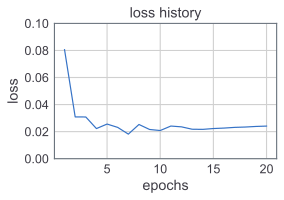

In [14]:
display.set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = (4, 2.5)
plt.plot(np.array(range(1, num_epoches + 1)), loss_history)
plt.title('loss history')
plt.xlabel('epochs')
plt.ylim(0, 0.1)
plt.ylabel('loss')
plt.show()

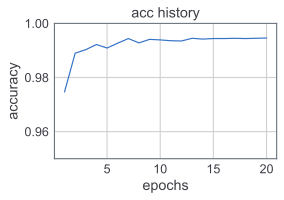

In [15]:
display.set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = (4, 2.5)
plt.plot(np.array(range(1, num_epoches + 1)), acc_history)
plt.title('acc history')
plt.xlabel('epochs')
plt.ylim(0.95,1.0)
plt.ylabel('accuracy')
plt.show()